# Introduction

<div class="alert alert-block alert-info">
<ul>
    <li> <b>Dataset #1: </b|> Image Dataset => Classify Different Letters (Hindi) </li>
    <li> <b> Source: </b> Devanagari Handwritten Character Dataset Data Set </li> 
    <li> <a> (https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset) </a> </li>
    <li> Dataset includes 36 different classes </li>
    <li> <b> Test Data is seperate from Train Data </b></li>
</div>

## Imports

In [90]:
from matplotlib import image as mimage
from matplotlib import pyplot
from matplotlib.pyplot import imshow
import numpy as np
import os
import collections
import pandas as pd
from random import randint
import seaborn as sns
from PIL import Image
from IPython.display import display
import sklearn
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp
from sklearn import model_selection as sklms
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import time

## Load Images

In [91]:
def load_image_PIL(directory):
    # Load Image using PIL, given directory
    loaded_images = []
    for subdir, dirs, files in os.walk(directory):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith('png'):
                character_num = subdir.split('_')[1]
                character_name = subdir.split('_')[2]
                # Get the Character Num (For the label using the directory)
                im = Image.open(filepath)
                data = np.array(im)
                # Load in the images with its label
                loaded_images.append((data, character_num))
                im.close()
    return loaded_images

def load_image_plt_image(directory):
    # Load Image using matplotlib, given directory
    loaded_images_gs = []
    for subdir, dirs, files in os.walk(directory):
        for filename in files:
            filepath = subdir + os.sep + filename
            if filepath.endswith('png'):
                character_num = subdir.split('_')[1]
                # Get the Character Num (For the label using directory)
                character_name = subdir.split('_')[2]
                # Load in the images with its label
                # Matplotlib default scales grayscale images (Useful for training)
                im = mimage.imread(filepath)
                loaded_images_gs.append((im, character_num))
    return loaded_images_gs


<div class="alert alert-block alert-info">
    <p> Here I used both, <b>matplotlib</b> and <b>PIL</b> to load in the images. The reason I did this was because matplotlib  loads in grayscale and rescales the each 8-bit pixel into a float from 0.0-1.0. The PIL library leaves it between 0-256. This was interesting because it allowed me to explore the data without it being standardized first.</p>
    
 (Matplotlib.pyplot.imread) 
</div>   
 
 

<div class="alert alert-block alert-info">
    <b>Process:</b>
    <ul> 
        <li> Walk through data directory </li>
        <li> Dataset structures as /character_{number}_{name}/{sample-number}.png </li>
        <li>Extract label from each directory and attatch to the image, and return list </li>    
    </ul> 
</div>

In [92]:
training_data_PIL = load_image_PIL('../datasets/DevanagariHandwrittenCharacterDataset/Train')
training_data_plt = load_image_plt_image('../datasets/DevanagariHandwrittenCharacterDataset/Train')
testing_data_PIL = load_image_PIL('../datasets/DevanagariHandwrittenCharacterDataset/Test')
testing_data_plt = load_image_plt_image('../datasets/DevanagariHandwrittenCharacterDataset/Test')

(32, 32)
23


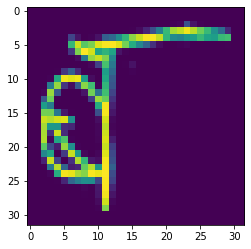

In [93]:
image, label = training_data_PIL[randint(0,len(training_data_PIL))]

print(image.shape)
print(label)
imshow(image)

<div class="alert alert-block alert-info">
    <ul> 
        <li> Image Shape: (32 x 32) </li>
        <li> Class: 20 </li>
        <li> Checking if data is loaded and classified correctly </li>    
    </ul> 
</div>

In [94]:
def add_label(image_list):
    x = []
    for image, label in image_list:
        sample = np.reshape(image, 1024)
        sample = np.insert(sample, len(sample), label)
        x.append(sample)

    x = np.array(x)
    return x 

Convert image from 2d Array -> 1d array to (32 x 32) features + 1 for the label. Add the label to the end of the numpy array so that it can be attatched to the data sample and used for exploring the data_set

In [95]:
train_data_PIL = add_label(training_data_PIL)
train_data_plt = add_label(training_data_plt)
test_data_PIL = add_label(testing_data_PIL)
test_data_plt = add_label(testing_data_plt)

# a) Exploration of Dataset

**Note:** For exploration below I used the PIL images because it kept it in (0,256).

In [96]:
num_samples_train, features_train = train_data_PIL.shape
num_samples_test, features_test = test_data_PIL.shape

print(f'Number of Training Samples : {num_samples_train}')
print(f'Number of Testing Samples : {num_samples_test}')
# x is in the form of 1024 features with last as a label, so we can subtract it ...
print(f'Number of Features : {features_train - 1}') 


Number of Training Samples : 61200
Number of Testing Samples : 10800
Number of Features : 1024


- **Number of Training Samples :** 61200
- **Number of Testing Samples :** 10800
- **Number of Features :** 1024

In [97]:
# Image Mean of each letter
col = [i for i in range(1,1025)]
col.append('Label')

df = pd.DataFrame(train_data_PIL, columns = col)

# train data grouped by each label, with the mean associated
mean_df = df.groupby(['Label'], as_index=True).mean()
mean_df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Label,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
(mean_df == 0.0).sum(axis=1)

Label
1     240
2     240
3     240
4     240
5     240
6     240
7     240
8     240
9     240
10    240
11    240
12    240
13    240
14    240
15    240
16    240
17    240
18    240
19    240
20    240
21    240
22    240
23    240
24    240
25    240
26    240
27    240
28    240
29    240
30    240
31    240
32    240
33    240
34    240
35    240
36    240
dtype: int64

Each class has about 240 columns with all zeroes. 

In [99]:
mean_df.loc[:, (df == 0).all()].columns

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024],
      dtype='object', length=240)

These are the columns with all zeroes, and based on the images that are shown, it seems like the handwritten message is only in center of the image, so these pixels are just place holders.

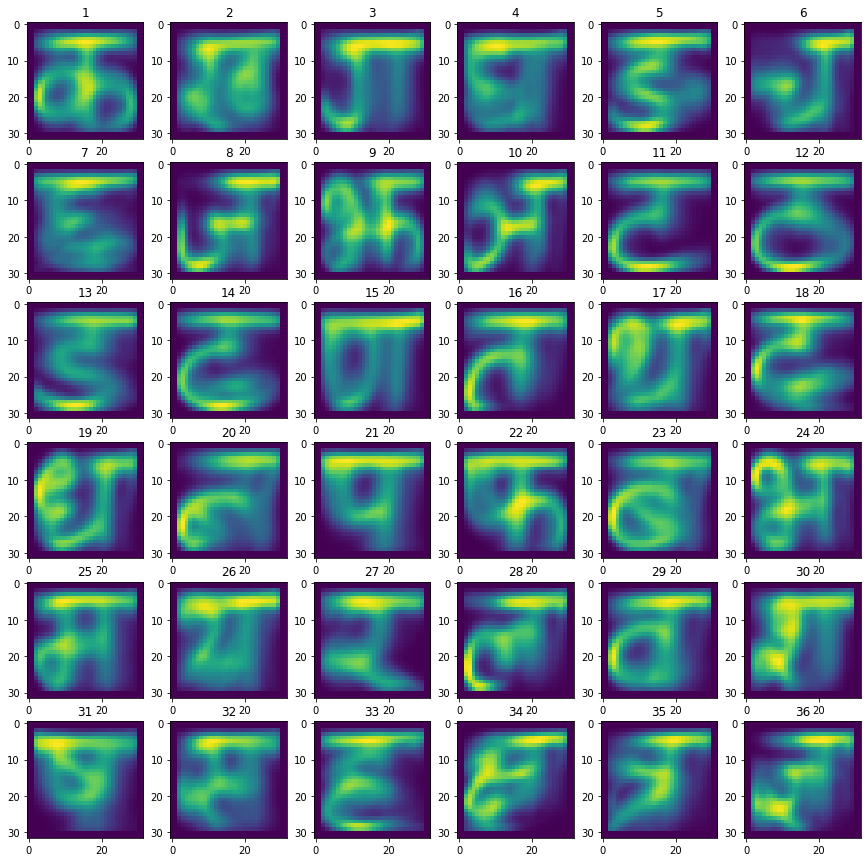

In [100]:
# mean of every image, makes out the letter
fig, axes = pyplot.subplots(6, 6, figsize=(15,15))
counter_x = 0
counter_y = 0
for index, row in mean_df.iterrows():
    # plot the mean of each image, it makes it out to be very similar to the letter
    if counter_y > 5:
        counter_x += 1
        counter_y = 0
    label = int(index)
    axes[counter_x][counter_y].imshow(row.to_numpy().reshape(32,32))
    axes[counter_x][counter_y].set_title(f'{label}')
    counter_y += 1
    

Image Mean plot of every letter going to be classified

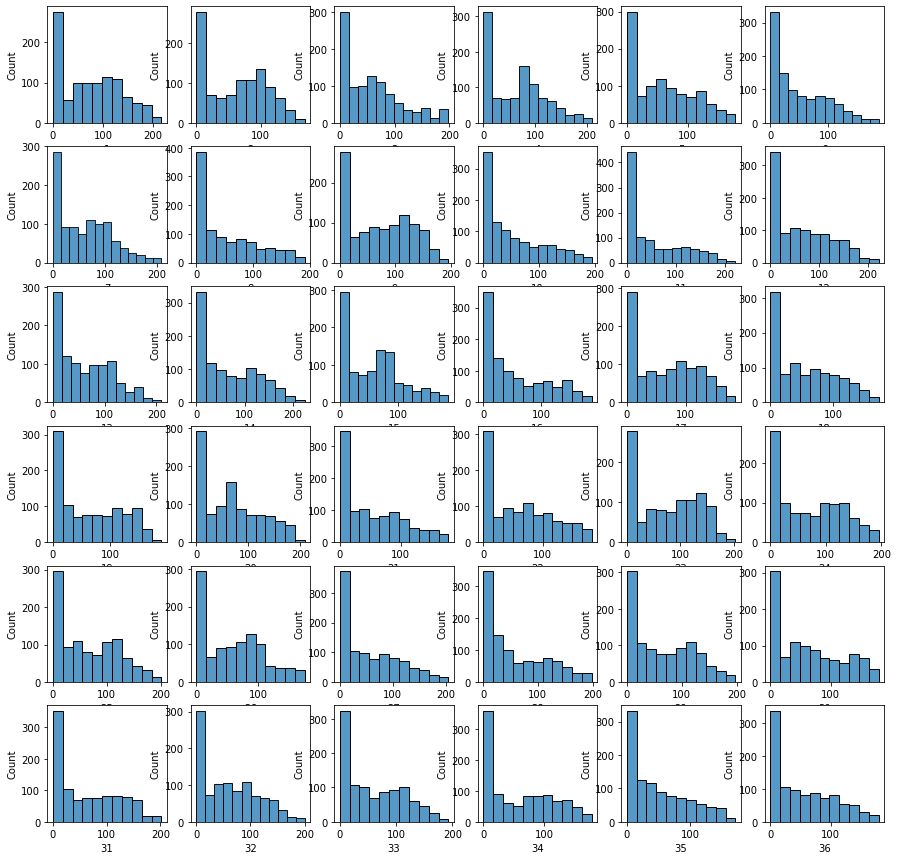

In [101]:
# Average of image plotted
fig, axes = pyplot.subplots(6, 6, figsize=(15,15))
counter_x = 0
counter_y = 0
for index, row in mean_df.iterrows():
    if counter_y > 5:
        counter_x += 1
        counter_y = 0
        
    sns.histplot(row, ax=axes[counter_x][counter_y])
    counter_y += 1

All 36 labels have a very high frequency of zeroes. Moreover, most classes look like they have a peak around the 100 pixel mark which is very interesting, because that shows that there is good intensity within each class to determine the image. 

In [102]:
counts = df.groupby(['Label']).size().reset_index(name='counts')
counts

,Label,counts
0,1,1700
1,2,1700
2,3,1700
3,4,1700
4,5,1700
5,6,1700
6,7,1700
7,8,1700
8,9,1700
9,10,1700


**Key Observations:** 
- When using matplotlib image library vs PIL image library, matplotlib standardizes the images, while PIL keeps original (0, 256) form.
- There are a large amount of features in the dataset (1024)
- All 36 labels each have 240 features with all 0.0 as the entry (useful to know)
- All 36 labels have equal amount of images per class (1700)
- Large amount of 0 pixel in the dataset

# b) Pre Processing

Intuition Based on the Data Exploration:
 - Many of the image features have '0' as the RGB value so many of these features can most likely be reduced
 - Based on the Histogram, 0 is the most common pixel
 - Since there are around 240 columns with all 0, we can perform **PCA** on the dataset, but first we should center the data

In [103]:
# We should standardize/normalize the data array so we can prepare it for PCA
Y = train_data_plt[:, -1] # class label
full_data = train_data_plt
X = train_data_plt[:, :-1]
print(Y.shape)
print(X.shape)

(61200,)
(61200, 1024)


In [104]:
# Create a Mean Data Scaler, and scale it with the Mean
mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)

# This step uses the mean_datascaler to get the mean of X and transform it into a centered matrix 
skl_centered_X = mean_datascaler.fit_transform(X)

skl_centered_X[0][1000]


0.0

In [105]:
skl_centered_X[0][600]

-0.21811931

Explanation: 
- Made sure X-> features, seperate from Y -> Label
- Computed the mean data matrix to prepare for PCA since it requires data to be centered 
- Did not perform any other preprocessing steps, I couldve removed the columns that were 0, but decided against it as PCA take care of that issue of dimension reductionality
- Did not do stddev because I wanted the variance to be explained more, esp if we are getting cov matrix from pca

# c) Feature Extraction

- Performing PCA on the data matrix because many 0 values and very high dimensionality, so it might be a good idea to perform this

In [106]:
pca = skldecomp.PCA(n_components = 0.95, svd_solver='full')
pca.fit(skl_centered_X)
X_features = pca.transform(skl_centered_X)


`skldecomp.PCA(n_components = 0.95, svd_solver='full')`

Using the PCA library from sklearn
Justification of the parameters
- n_components: Since, I was not sure how many components I need from the beginning, I used the explained variance option for n_components to be 0.95. I thought this was very helpful as it gave me the components that were useful to having 0.95 variance -> finds dimensions that explains this variance.
- There was this option as well: n_components == min(n_samples, n_features), but I advised against it after trying the varianace explained method.

- svd_solver is full: meaning it will use singular value decomposition from numpy library to get the singular values and diagonal matrix

(Mikulskibartosz. “PCA - How to Choose the Number of Components)
https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

In [107]:
X_features.shape
print(f'Reduced # of Features by 1024 to {X_features.shape[1]}')

Reduced # of Features by 1024 to 177


In [108]:
X_features.shape

(61200, 177)

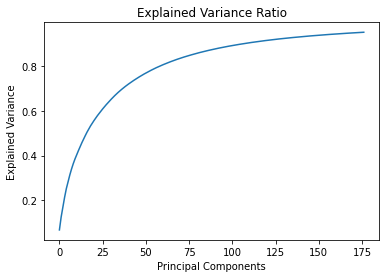

array([0.06831884, 0.05738673, 0.04554434, 0.04273609, 0.03845392,
       0.03119644, 0.02947181, 0.02668682, 0.02382875, 0.02108136,
       0.0193906 , 0.01808953, 0.01790094, 0.01746078, 0.01630142,
       0.0157729 , 0.01532665, 0.01410139, 0.01325795, 0.0123177 ,
       0.01158009, 0.01120468, 0.01080038, 0.01012725, 0.00994022,
       0.00968197, 0.00929   , 0.00902768, 0.00861587, 0.00844372,
       0.00833183, 0.00805195, 0.00771705, 0.0074324 , 0.00707469,
       0.00682197, 0.00652837, 0.00634393, 0.00608381, 0.005945  ,
       0.00560441, 0.00551664, 0.00536772, 0.00519387, 0.00507184,
       0.00490106, 0.00481252, 0.00468481, 0.00455464, 0.0044868 ,
       0.00427594, 0.0041968 , 0.00408972, 0.00400342, 0.0039197 ,
       0.00381992, 0.00366536, 0.00350889, 0.00343189, 0.00340086,
       0.00328841, 0.00318649, 0.00311678, 0.00307358, 0.00300021,
       0.00293902, 0.00290381, 0.00278891, 0.00268365, 0.00263747,
       0.00258761, 0.00254349, 0.00242353, 0.00241279, 0.00234

In [109]:
pyplot.plot(range(0,177), np.cumsum(pca.explained_variance_ratio_))
pyplot.ylabel('Explained Variance')
pyplot.xlabel('Principal Components')
pyplot.title('Explained Variance Ratio')
pyplot.show()
pca.explained_variance_ratio_

# d) Machine Learning Methods

In [110]:
Y_test = test_data_plt[:, -1] # class label
full_data = test_data_plt
X_test = test_data_plt[:, :-1]
print(Y_test.shape)
print(X_test.shape)

(10800,)
(10800, 1024)


In [111]:
# FIT PCA MODEL TO TEST DATA
skl_centered_X_test = mean_datascaler.fit_transform(X_test)

X_features_test = pca.transform(skl_centered_X_test)
X_features_test.shape

(10800, 177)

In order to compute the ML methods, the test data also needs to apply the same PCA transformation as the train data. So, in order to do this, I fit the previous PCA function to this model.

**Important Note:**
Since my test dataset was given seperate, my cross validation strategy is as follows for all of the following algorithms: 
 - Using Sklearn KFold function it splits the data into 5 seperate folds
 - Within each iteration of each fold, I train the model, and use the validation and report the accuracy score (percentage of incorrectly classified) 
 - After the K-folds are done, I picked the best tuning parameter
 - I retrained the algorithm with now all of the train_data (train + validation folds), with that specific tuning parameter
 - Then I tested using the test_data and reported results

# i) SVM

**Reasons SVM Chosen:**
Note: Datset is definitely large, so not best idea to use SVM BUT: 
 - SVM requires few samples (even though there were many samples, there were also many classes so 1700 images for each class, so this definitely can help
 - Uses hyperplane to distinguish classes, pca helps with the dataset
 - Sklearn.model_selection.KFold

In [112]:
KFoldRun = collections.namedtuple('KFoldRun', 'iteration c accuracy confusion_matrix model')

In [113]:
kf = sklms.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X_features)
C_values = [0.1, 0.5, 1, 1.5, 2]
counter = 0

k_fold_runs_linear = []
# call SVM each iteration and test the validation data, and compare results for C in hyperparameter 
for train_index, validation_index in kf.split(X_features):
    X_train, X_validation = X_features[train_index], X_features[validation_index]
    Y_train, Y_validation = Y[train_index], Y[validation_index]
    clf = svm.LinearSVC(C=C_values[counter], dual=False, loss='squared_hinge', multi_class='ovr')
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_validation)
    confu_matrix = confusion_matrix(Y_validation, predicted)
    accuracy = accuracy_score(Y_validation, predicted)
    k_fold_runs_linear.append(KFoldRun(iteration=counter, c=C_values[counter], accuracy=accuracy, 
                                       confusion_matrix=confu_matrix, model=clf))
    print(f'Iteration {counter + 1} Complete')
    counter +=1


Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete


**SVC NOTES**

`svm.LinearSVC(C=C_values[counter], dual=False, loss='squared_hinge', multi_class='ovr')`
- Kept the tuning params fairly small so I can see the regularization strenght
- For the classifier => dual formulation because n samples >>>>> n features
- Since using dual formulation to learn the results, 'hinge' loss is not supported in the sklearn function, so I investigated how squared-hinge works (more to follow in video) 
- For multi-class I used 'ovr' to specify the one vs rest strategy so it runs # of classes time to classify
- The other params, such as tol, and max iter did not need to be modified as it was converging.

In [114]:
for iteration, c, accuracy, _, model in k_fold_runs_linear:
    print(f'Iteration: {iteration}, C: {c},  Accuracy: {accuracy}, Model: {model}')

Iteration: 0, C: 0.1,  Accuracy: 0.6827614379084967, Model: LinearSVC(C=0.1, dual=False)
Iteration: 1, C: 0.5,  Accuracy: 0.6745915032679739, Model: LinearSVC(C=0.5, dual=False)
Iteration: 2, C: 1,  Accuracy: 0.6833333333333333, Model: LinearSVC(C=1, dual=False)
Iteration: 3, C: 1.5,  Accuracy: 0.6766339869281046, Model: LinearSVC(C=1.5, dual=False)
Iteration: 4, C: 2,  Accuracy: 0.6838235294117647, Model: LinearSVC(C=2, dual=False)


In [115]:
iteration, best_c, accuracy, _, model = max(k_fold_runs_linear, key = lambda i : i[2])
print(f'Best Accuracy: {accuracy}\nBest C : {best_c}')

Best Accuracy: 0.6838235294117647
Best C : 2


In [116]:
start = time.time()
clf_linear = svm.LinearSVC(C=best_c, dual=False, loss='squared_hinge', multi_class='ovr')
clf_linear.fit(X_features, Y)
end = time.time()
print(end - start, "seconds")

48.034071922302246 seconds


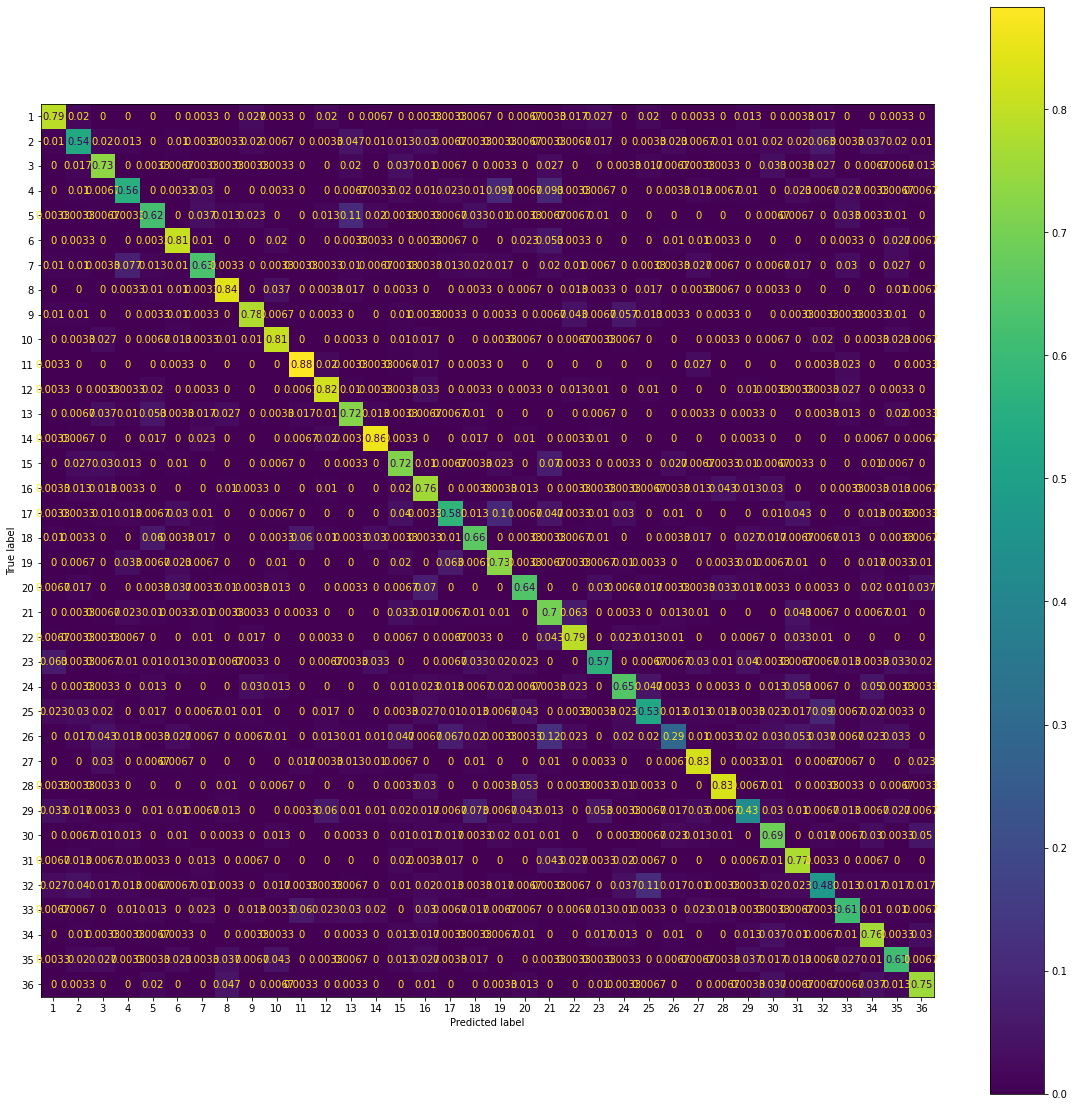

In [117]:
fig, ax = pyplot.subplots(figsize=(20, 20))
predicted = clf_linear.predict(X_features_test)
disp_linear_svc = plot_confusion_matrix(clf_linear, X_features_test, Y_test,ax = ax, display_labels=[i for i in range (1,37)], normalize='true')
pyplot.show()     

In [118]:
print(metrics.classification_report(Y_test, predicted, zero_division=0))
svc_metrics = metrics.classification_report(Y_test, predicted, zero_division=0, output_dict=True)
accuracy_svc = accuracy_score(Y_test, predicted)

              precision    recall  f1-score   support

         1.0       0.77      0.79      0.78       300
         2.0       0.61      0.54      0.57       300
         3.0       0.68      0.73      0.71       300
         4.0       0.67      0.56      0.61       300
         5.0       0.65      0.62      0.64       300
         6.0       0.74      0.81      0.77       300
         7.0       0.70      0.63      0.66       300
         8.0       0.80      0.84      0.82       300
         9.0       0.80      0.78      0.79       300
        10.0       0.77      0.81      0.79       300
        11.0       0.83      0.88      0.85       300
        12.0       0.77      0.82      0.79       300
        13.0       0.68      0.72      0.70       300
        14.0       0.82      0.86      0.84       300
        15.0       0.64      0.72      0.68       300
        16.0       0.62      0.76      0.68       300
        17.0       0.63      0.58      0.60       300
        18.0       0.65    

**Summary of SVC:** 
 - **Accuracy on DataSet:** 0.69
 - **Top Misclassified Letter:** Label 26
 - **Least Misclassified Letter:** 11
 - **Note: I did nonlinear kernel (rgb) for a lower amount of classes, and got really good results, however, the computation took a very long time, I included the code at the bottom of the notebook. **

# ii) Logistic Regression

**Reasons LR Chosen:**
- Logistic for Image classification, because the data is seperated into classes and can learn hyperplane

In [119]:
# first split train and validation set multiple times 
kf = sklms.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X_features)
C_values = [0.1, 0.5, 1, 1.5, 2]
counter = 0

k_fold_runs_logistic = []
for train_index, validation_index in kf.split(X_features):
    X_train, X_validation = X_features[train_index], X_features[validation_index]
    Y_train, Y_validation = Y[train_index], Y[validation_index]
    clf = LogisticRegression(penalty='l1', dual=False, C=C_values[counter], multi_class='ovr', solver='saga',tol= 0.01, max_iter=500, n_jobs=-1,)
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_validation)
    confu_matrix = confusion_matrix(Y_validation, predicted)
    accuracy = accuracy_score(Y_validation, predicted)
    k_fold_runs_logistic.append(KFoldRun(iteration=counter, c=C_values[counter], accuracy=accuracy, 
                                         confusion_matrix=confu_matrix, model=clf))
    print(f'Iteration {counter + 1} Complete')
    counter +=1

Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete


**Logistic Regression NOTES**

`LogisticRegression(penalty='l1', C=C_values[counter], multi_class='ovr', solver='saga',tol= 0.01, n_jobs=-1,)`
- penalty_term: I used L1 penalty because even though I did PCA to reduce the dimensionality, if I used L1 penalty all of the features that dont contribute as much will become 0 and they would not be a part of the model, and since there were a lot of 0 in the dataset, I thought it would be interesting to use it to see if the data was sparse. 
- C-values (tuning param) not on the 1-norm, but the loss, this is opposite of class, so lower the values, the more szeroes the coeff gets, tuning this variable
- dual=False, reccomended by sklearn if n samples> n features
- multi-class -> One vs Rest strategy
- solver -> Used Saga since dataset is large, and according to chart on https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression, if using l1 penalty with ovr only options are liblinear, and saga, and saga is used with large datasets. It uses stochastic gradient descent to find optimal values
- tol/max_iter -> I had to increase tolerance bc it was not converging even though it was giving good results.

In [120]:
for iteration, c, accuracy, _, model in k_fold_runs_logistic:
    print(f'Iteration: {iteration}, C: {c},  Accuracy: {accuracy}, Model: {model}')

Iteration: 0, C: 0.1,  Accuracy: 0.6895424836601307, Model: LogisticRegression(C=0.1, max_iter=500, multi_class='ovr', n_jobs=-1,
                   penalty='l1', solver='saga', tol=0.01)
Iteration: 1, C: 0.5,  Accuracy: 0.6830065359477124, Model: LogisticRegression(C=0.5, max_iter=500, multi_class='ovr', n_jobs=-1,
                   penalty='l1', solver='saga', tol=0.01)
Iteration: 2, C: 1,  Accuracy: 0.6852124183006536, Model: LogisticRegression(C=1, max_iter=500, multi_class='ovr', n_jobs=-1,
                   penalty='l1', solver='saga', tol=0.01)
Iteration: 3, C: 1.5,  Accuracy: 0.6912581699346405, Model: LogisticRegression(C=1.5, max_iter=500, multi_class='ovr', n_jobs=-1,
                   penalty='l1', solver='saga', tol=0.01)
Iteration: 4, C: 2,  Accuracy: 0.6876633986928105, Model: LogisticRegression(C=2, max_iter=500, multi_class='ovr', n_jobs=-1,
                   penalty='l1', solver='saga', tol=0.01)


In [121]:
iteration, best_c, accuracy, _, model = max(k_fold_runs_logistic, key = lambda i : i[2])
print(f'Best Accuracy: {accuracy}\nBest C : {best_c}')

Best Accuracy: 0.6912581699346405
Best C : 1.5


In [122]:

start = time.time()
clf_logistic = LogisticRegression(penalty='l1', C=best_c, multi_class='ovr', solver='saga',tol= 0.01, n_jobs=-1, max_iter=500)
clf_logistic.fit(X_features, Y)
end = time.time()
print(end - start, "seconds")

25.633661031723022 seconds


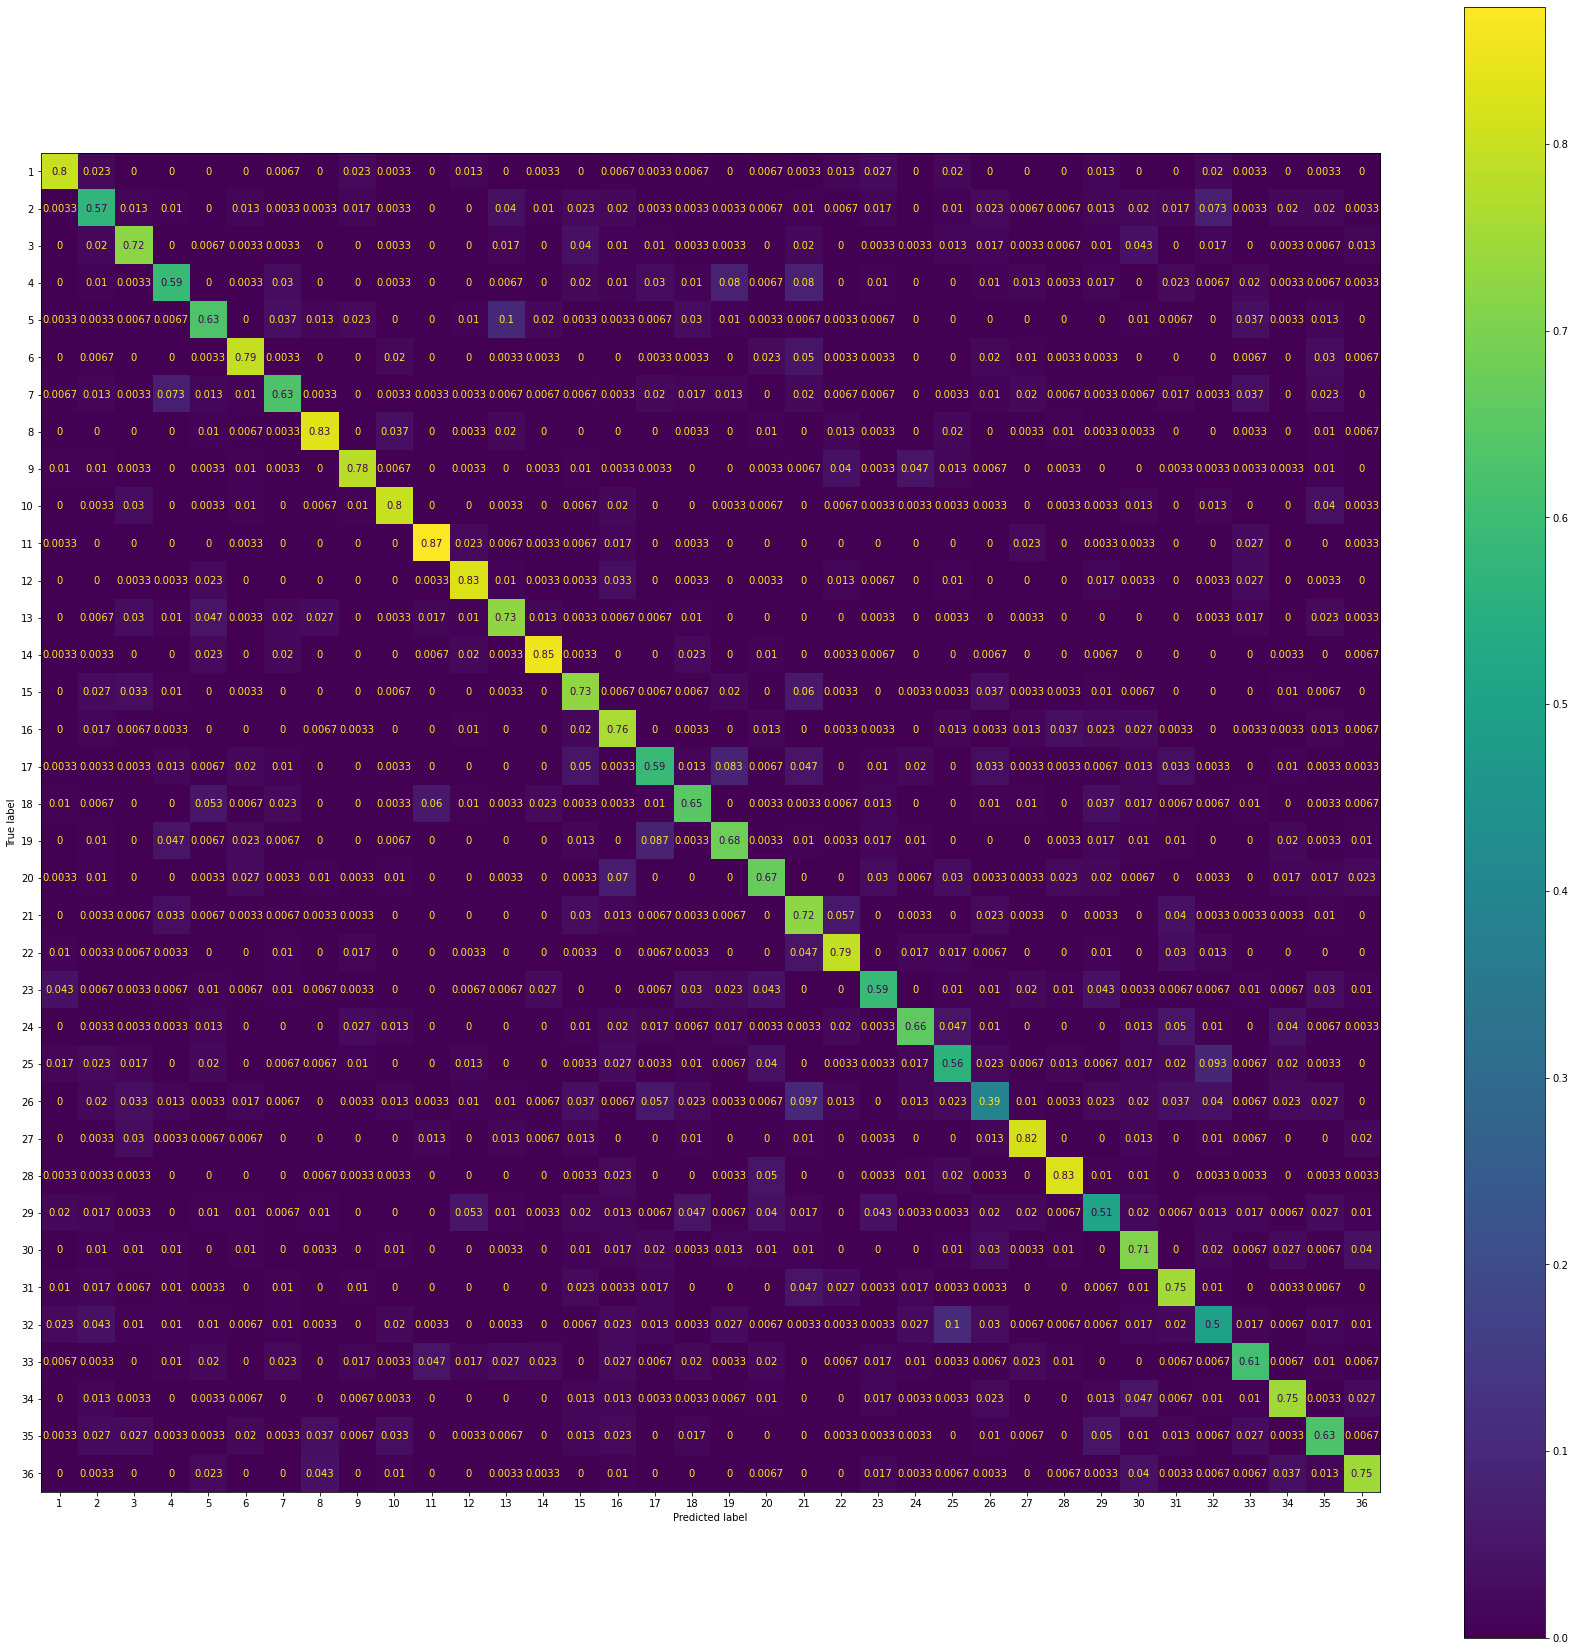

In [123]:
fig, ax = pyplot.subplots(figsize=(30, 30))
predicted = clf_logistic.predict(X_features_test)
disp_logistic = plot_confusion_matrix(clf_logistic, X_features_test, Y_test, ax=ax, display_labels=[i for i in range (1,37)], normalize='true')
pyplot.show()


In [124]:
print(metrics.classification_report(Y_test, predicted, zero_division=0))
logistic_metrics = metrics.classification_report(Y_test, predicted, zero_division=0, output_dict=True)
accuracy_logistic = accuracy_score(Y_test, predicted)

              precision    recall  f1-score   support

         1.0       0.81      0.80      0.81       300
         2.0       0.61      0.57      0.59       300
         3.0       0.71      0.72      0.71       300
         4.0       0.68      0.59      0.63       300
         5.0       0.65      0.63      0.64       300
         6.0       0.78      0.79      0.78       300
         7.0       0.70      0.63      0.66       300
         8.0       0.81      0.83      0.82       300
         9.0       0.81      0.78      0.80       300
        10.0       0.78      0.80      0.79       300
        11.0       0.85      0.87      0.86       300
        12.0       0.79      0.83      0.81       300
        13.0       0.70      0.73      0.72       300
        14.0       0.84      0.85      0.85       300
        15.0       0.64      0.73      0.68       300
        16.0       0.64      0.76      0.69       300
        17.0       0.63      0.59      0.61       300
        18.0       0.67    

**Summary of Losgistic Regression:**
 - **Accuracy on DataSet:** 0.70
 - **Top Misclassified Letter:** 26
 - **Least Misclassified Letter:** 11

# iii) KNN

In [125]:
kf = sklms.KFold(n_splits=5, shuffle=True)
kf.get_n_splits(X_features)
neighbors = [3, 5, 7, 9, 11]
counter = 0

k_fold_runs_knn = []
for train_index, validation_index in kf.split(X_features):
    X_train, X_validation = X_features[train_index], X_features[validation_index]
    Y_train, Y_validation = Y[train_index], Y[validation_index]
    knn = KNeighborsClassifier(n_neighbors=neighbors[counter], algorithm='auto', p=2, weights='uniform', n_jobs=-1)
    knn.fit(X_train, Y_train)
    predicted = knn.predict(X_validation)
    accuracy = accuracy_score(Y_validation, predicted)
    confu_matrix = confusion_matrix(Y_validation, predicted)
    k_fold_runs_knn.append(KFoldRun(iteration=counter, c=neighbors[counter], accuracy=accuracy, confusion_matrix=confu_matrix, model=knn))
    print(f'Iteration {counter + 1} Complete')
    counter +=1
    


Iteration 1 Complete
Iteration 2 Complete
Iteration 3 Complete
Iteration 4 Complete
Iteration 5 Complete


**KNN NOTES**

`KNeighborsClassifier(n_neighbors=neighbors[counter], algorithm='auto', p=2, weights='uniform', n_jobs=-1)`
- tune K which is the number of neighbors to choose which classification to pick
- algorithm options were BallTree and KDtree, I chose auto because it decides based on the values fit, but brute force would be finding all the distances, so I picked auto to speed up the process.
- p = 2 eucledian distance metric to be used
- weights uniform -> Thought about using distance, but ended with uniform and just picking this way since we are tuning K, I thought keeping it uniform would help with determining this. 

In [126]:
for iteration, c, accuracy, _, model in k_fold_runs_knn:
    print(f'Iteration: {iteration}, C: {c},  Accuracy: {accuracy}, Model: {model}')

Iteration: 0, C: 3,  Accuracy: 0.8913398692810458, Model: KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
Iteration: 1, C: 5,  Accuracy: 0.8988562091503268, Model: KNeighborsClassifier(n_jobs=-1)
Iteration: 2, C: 7,  Accuracy: 0.8896241830065359, Model: KNeighborsClassifier(n_jobs=-1, n_neighbors=7)
Iteration: 3, C: 9,  Accuracy: 0.8881535947712418, Model: KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
Iteration: 4, C: 11,  Accuracy: 0.8856209150326797, Model: KNeighborsClassifier(n_jobs=-1, n_neighbors=11)


In [127]:
iteration, best_k, accuracy, _, model = max(k_fold_runs_knn, key = lambda i : i[2])
print(f'Best Accuracy: {accuracy}\nBest K : {best_k}')

Best Accuracy: 0.8988562091503268
Best K : 5


When k = 5 its the best

In [128]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', n_jobs=-1)
knn.fit(X_features, Y)
end = time.time()
print(end - start, "seconds")

1.2537720203399658 seconds


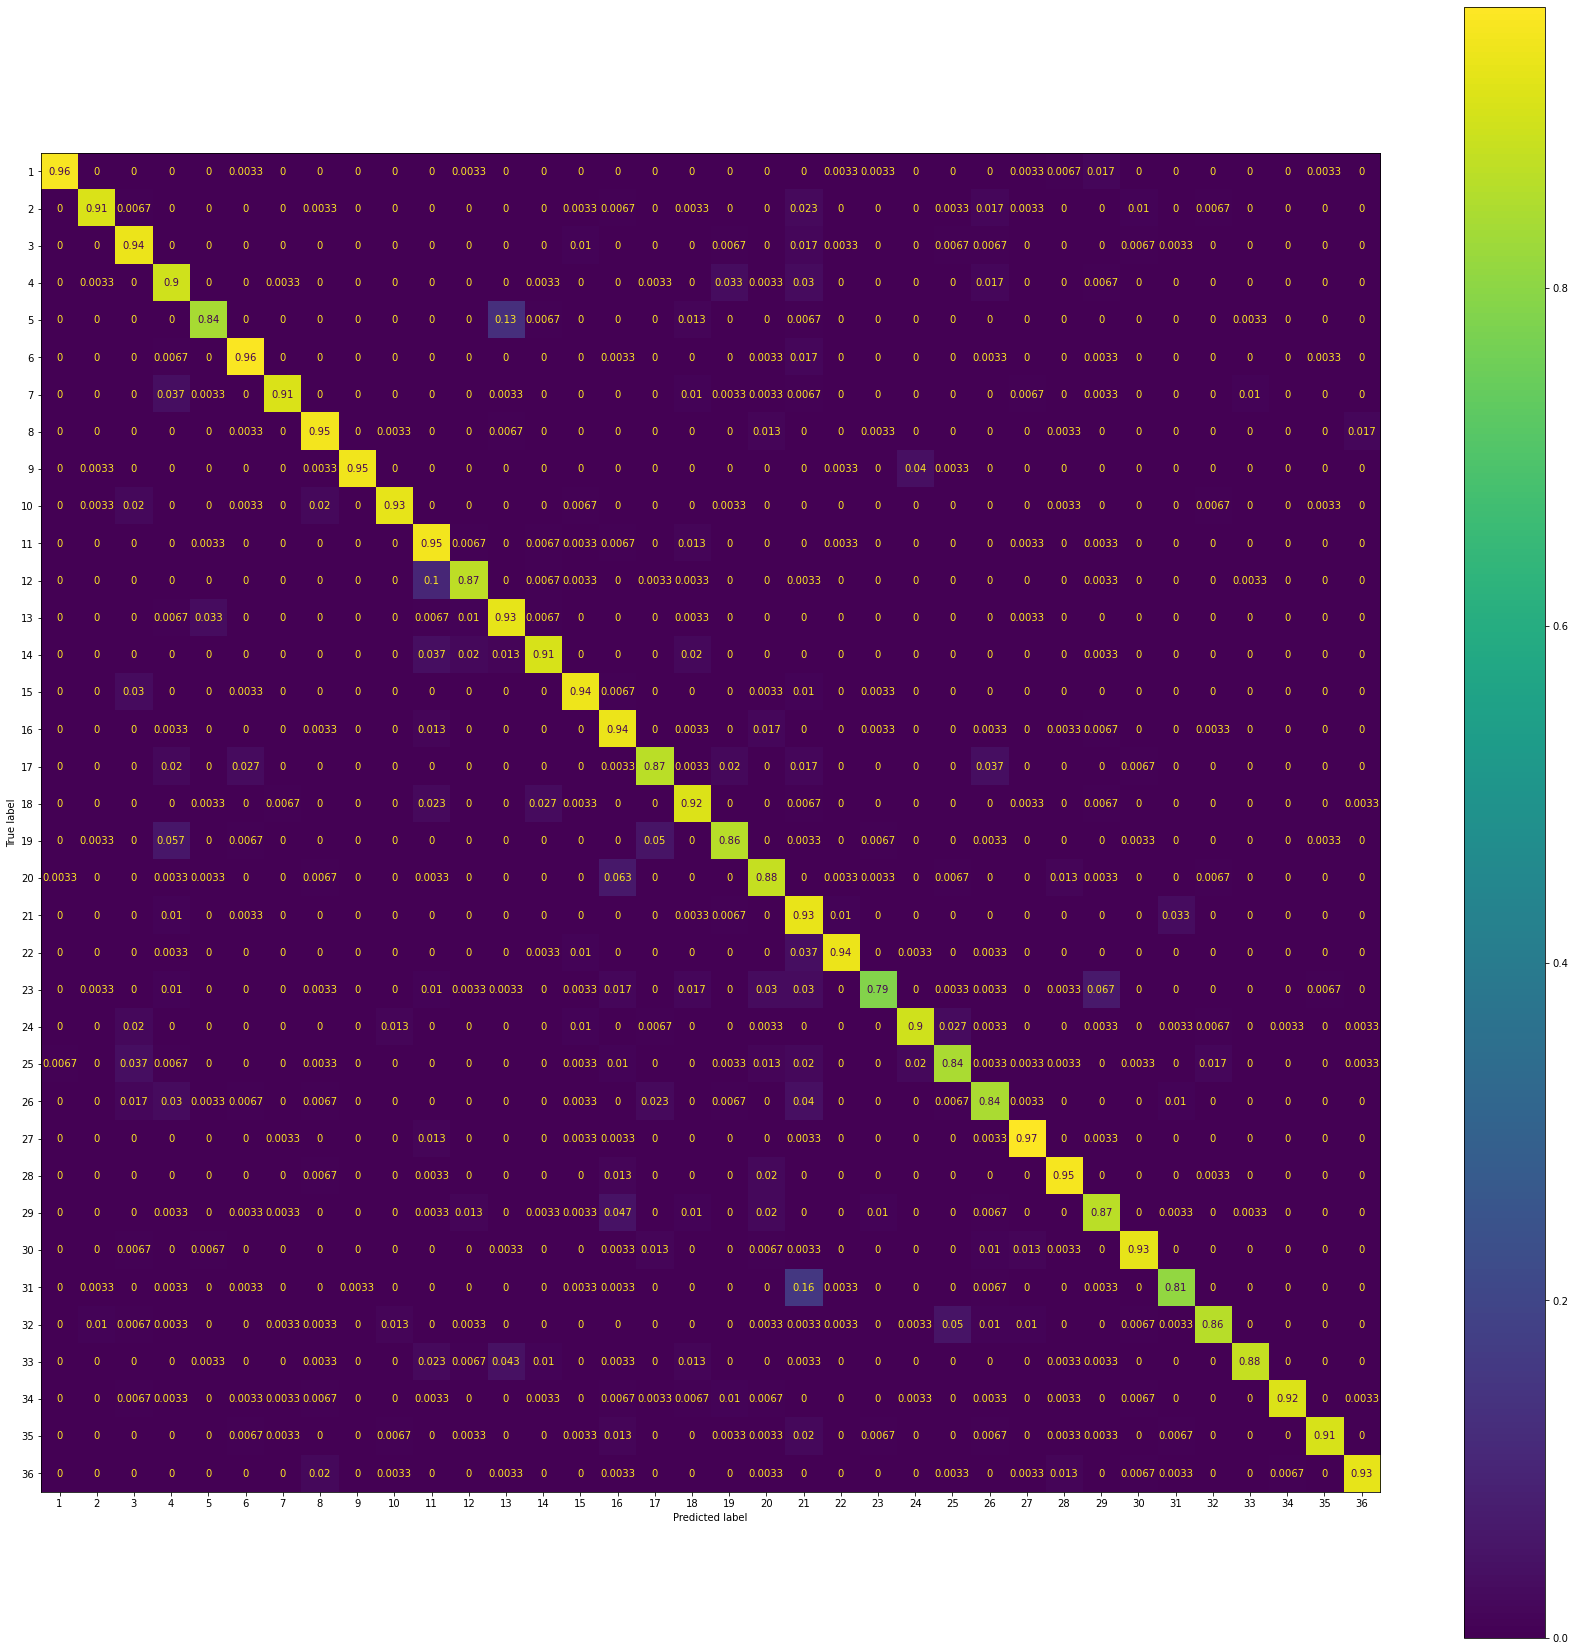

In [129]:
fig, ax = pyplot.subplots(figsize=(30, 30))
predicted = knn.predict(X_features_test)
disp_knn = plot_confusion_matrix(knn, X_features_test, Y_test, ax=ax, display_labels=[i for i in range (1,37)], normalize='true')
pyplot.show()

In [130]:
print(metrics.classification_report(Y_test, predicted, zero_division=0))
knn_metrics = metrics.classification_report(Y_test, predicted, zero_division=0, output_dict=True)
accuracy_knn = accuracy_score(Y_test, predicted)

              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97       300
         2.0       0.97      0.91      0.94       300
         3.0       0.86      0.94      0.90       300
         4.0       0.81      0.90      0.85       300
         5.0       0.93      0.84      0.88       300
         6.0       0.93      0.96      0.94       300
         7.0       0.97      0.91      0.94       300
         8.0       0.91      0.95      0.93       300
         9.0       1.00      0.95      0.97       300
        10.0       0.96      0.93      0.94       300
        11.0       0.80      0.95      0.87       300
        12.0       0.93      0.87      0.90       300
        13.0       0.82      0.93      0.87       300
        14.0       0.92      0.91      0.91       300
        15.0       0.93      0.94      0.94       300
        16.0       0.82      0.94      0.87       300
        17.0       0.89      0.87      0.88       300
        18.0       0.88    

**Summary of KNN:**
 - **Accuracy on DataSet:** 0.91
 - **Top Misclassified Letter:** 23
 - **Least Misclassified Letter:** [1,6]

# e) Comparitive Analysis 

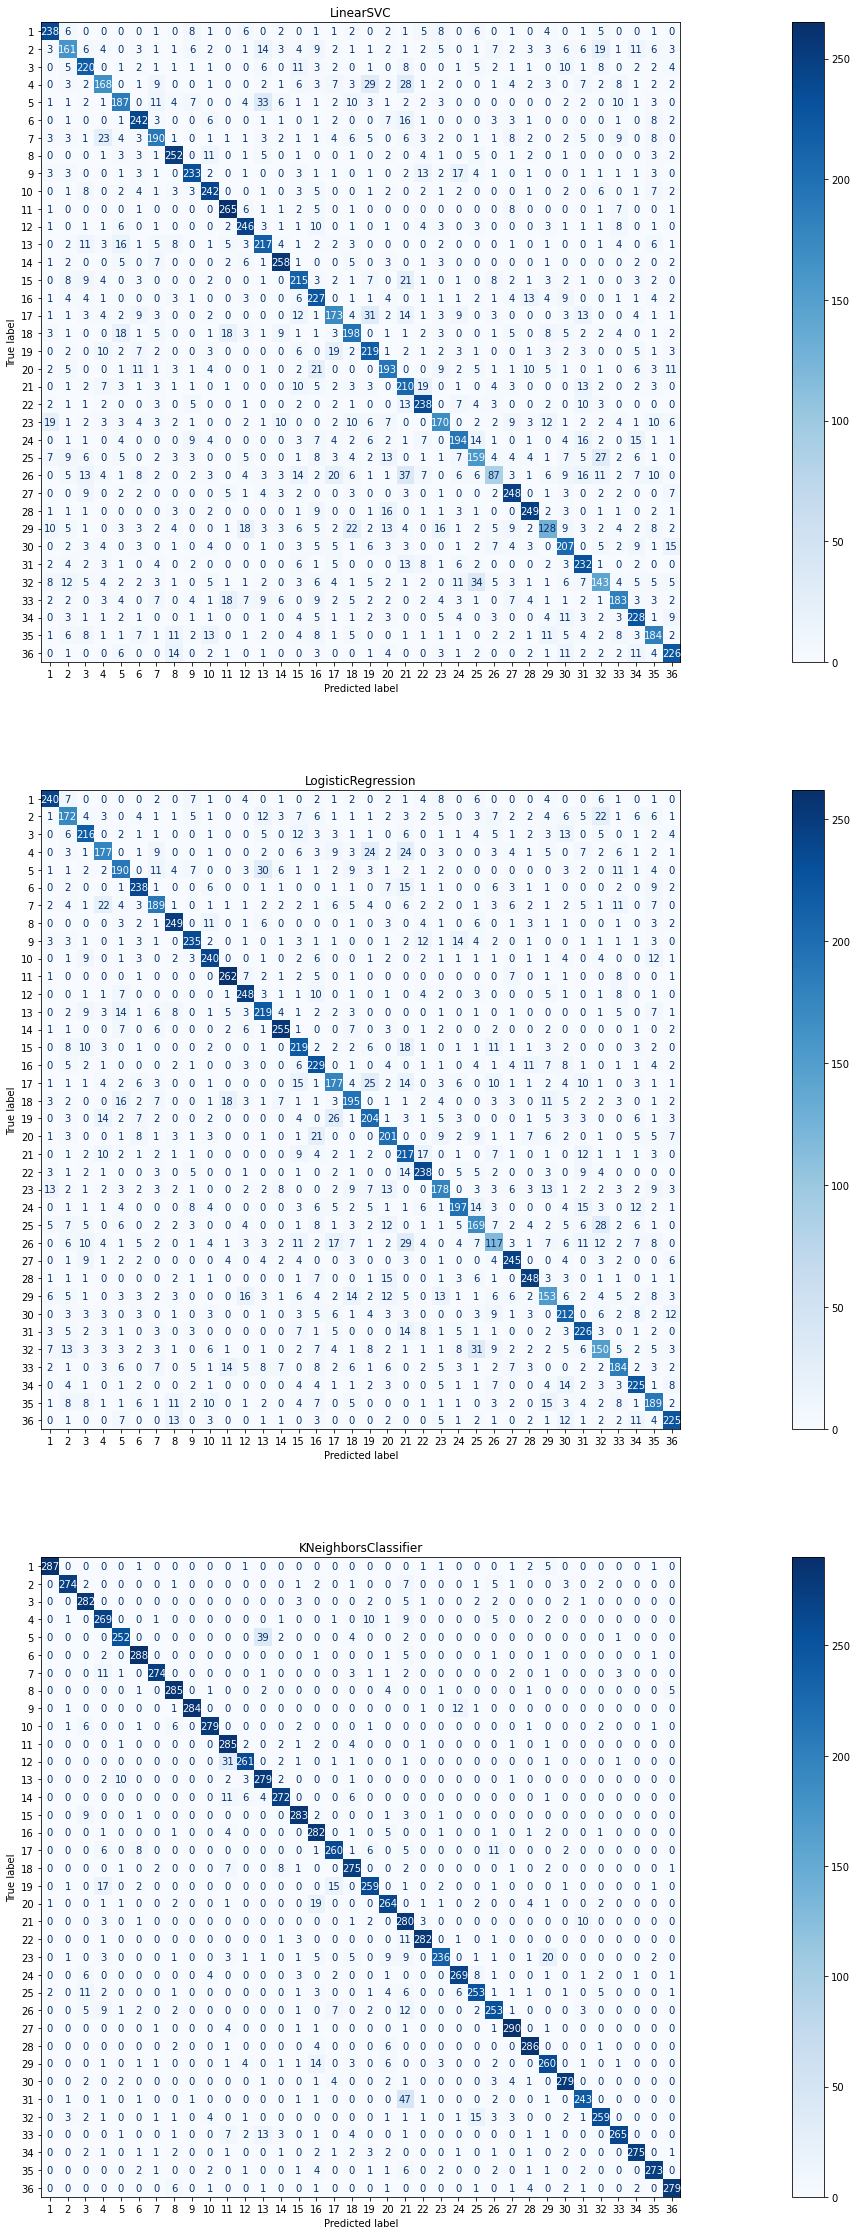

In [131]:
classifiers = [clf_linear, clf_logistic, knn]

fig, axes = pyplot.subplots(nrows=3, ncols=1, figsize=(40,40))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_features_test, 
                          Y_test, 
                          ax=ax,
                          cmap='Blues',
                         display_labels=[i for i in range (1,37)])
    ax.title.set_text(type(cls).__name__)
# https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix

In [132]:
pyplot.tight_layout()  
pyplot.show()

<Figure size 432x288 with 0 Axes>

In [133]:
accuracy_list = [accuracy_svc, accuracy_logistic, accuracy_knn]
metrics_list = [svc_metrics, logistic_metrics, knn_metrics]
for clf, acc, metrics in zip(classifiers, accuracy_list, metrics_list):
    weighted_f1 = metrics['weighted avg']['f1-score']
    print(f'Classifier: {type(clf).__name__} Accuracy: {acc} F1-Score: Weighted F1-Score: {weighted_f1}')


Classifier: LinearSVC Accuracy: 0.687962962962963 F1-Score: Weighted F1-Score: 0.6830723492386946
Classifier: LogisticRegression Accuracy: 0.697037037037037 F1-Score: Weighted F1-Score: 0.6952380964369379
Classifier: KNeighborsClassifier Accuracy: 0.9051851851851852 F1-Score: Weighted F1-Score: 0.9061860323906487


**Discussion**
 - SVC and Logistic Regression had the most misclassifications go to label 16 which I thought was very interesting
 - SVC, and Logistic Regression performed around the same, where KNN had a higher accuracy & F1-score metric
 - All the classifciations had a good diagonal on the confusion matrix which means many of the samples are classified correctly using the methods
 - KNN time took the most to train, even though predicting did not take as long
 
**Reccomendation**
- My reccomendation would be to use KNN Algorithm to classify, however an interesting case could be made for a nonlinear kernel based on my small subset of data. 


# f) Ethical Issues

 - I think that this dataset is very interesting that is related to different handwriting and classifying a letter. However, using this method without realizing where this data is actually coming from (which type of people, how many people, etc.) can provide bias in the training set. Furthermore, in the 'Understanding Data Bias' article, one of the concerns is 'data includes content produced by humans which may contain bias against groiups of people'(Krishnamurthy, 3). I think this is a very real possibility where there is not enough training data from a wide spectrum of people, and the algorithm cannot classify someone's handwriting just because they do not have i.e. an educational background, etc.) Furthermore, another ethical concern might be having a dataset that is culturally insensitive as well. 

# g) Bibliography

- “1.4. Support Vector Machines¶.” Scikit, scikit-learn.org/stable/modules/svm.html. 
- Aishwarya SinghAn avid reader and blogger who loves exploring the endless world of data science and artificial intelligence. Fascinated by the limitless applications of ML and AI; eager to learn and discover the depths of data science. 
-“Image Feature Extraction: Feature Extraction Using Python.” 
 Analytics Vidhya, 10 May 2020, www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/. 
- “Big Data Consultant.” Bartosz Mikulski, www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/ scikit-. 
- “Code Faster with Line-of-Code Completions, Cloudless Processing.” Kite, www.kite.com/python/answers/how-to-normalize-an-array-in-numpy-in-python. 
- “Matplotlib.pyplot.imread¶.” Matplotlib.pyplot.imread - Matplotlib 3.1.2 Documentation, matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imread.html. 
- “Sklearn.model_selection.KFold¶.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html. 
- vlasnalknsdvlasnalknsd                    10311 gold badge11 silver badge44 bronze badges, et al. “Applying PCA to Test Data for Classification Purposes.” Cross Validated, 1 May 1964, stats.stackexchange.com/questions/144439/applying-pca-to-test-data-for-classification-purposes. 
-Mikulskibartosz. “PCA - How to Choose the Number of Components?” Bartosz Mikulski, Mikulskibartosz, 3 June 2019, www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/. 

### URLS 
- https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/
- https://www.kite.com/python/answers/how-to-normalize-an-array-in-numpy-in-python
- https://stats.stackexchange.com/questions/144439/applying-pca-to-test-data-for-classification-purposes
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- https://scikit-learn.org/stable/modules/svm.html

# Non Linear SVM Attempt -> Computationally took too long

In [134]:
'''clf_nonlinear = svm.SVC(kernel='rbf', C=3,gamma=0.01, class_weight='balanced', decision_function_shape='ovr')
clf_nonlinear.fit(X_features, Y)'''

"clf_nonlinear = svm.SVC(kernel='rbf', C=3,gamma=0.01, class_weight='balanced', decision_function_shape='ovr')\nclf_nonlinear.fit(X_features, Y)"

In [135]:
'''predicted = clf_nonlinear.predict(X_features_test)
disp = plot_confusion_matrix(clf_nonlinear, X_features_test, Y_test, ax=None, display_labels=[1,2,3,4,5,6,7,8,9])
print(metrics.classification_report(Y_test, predicted, zero_division=0))
pyplot.show()'''


'predicted = clf_nonlinear.predict(X_features_test)\ndisp = plot_confusion_matrix(clf_nonlinear, X_features_test, Y_test, ax=None, display_labels=[1,2,3,4,5,6,7,8,9])\nprint(metrics.classification_report(Y_test, predicted, zero_division=0))\npyplot.show()'